In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.stats import kstest
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [44]:
df = pd.read_pickle('test.pkl')

In [70]:
def plot_BF_test_barplots(df, test, data_name, column, pvalue, N, pvalue2):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_theme(style="whitegrid", context="talk")
    df['Digit'] = df.index
    lol = pd.melt(df, id_vars=['Digit'], value_vars=['Benford distribution', data_name ])
    lol.rename(columns={'variable' : ' '}, inplace =True)
    sns.barplot(data=lol, y = 'value', x='Digit', hue =' ', alpha = 0.9, palette=sns.color_palette(colors), saturation =1 )
    plt.plot([], [], ' ', label="KS p-value: {:.5f}".format(pvalue2.pvalue))
    plt.plot([], [], ' ', label="\u03C72 p-value: {:.5f}".format(pvalue.pvalue))

    plt.legend([],[], frameon=False)
    plt.xlabel(test)
    plt.ylabel('Occurence [%]')
    plt.title('N = {}'.format(N))
    fig.legend(loc=7)
    fig.tight_layout()
    fig.subplots_adjust(right=0.72)   

    plt.savefig(data_name)

In [71]:
def benford_checker(df, column, data_name):
    df = df[df[column] != 0 ]
    N = len(df)
    df['First digit'] = df[column].apply(lambda x : int(str(x)[0]))
    df['Second digit'] = df[column].apply(lambda x : int(str(x)[1]))
    for test in ['First digit', 'Second digit']:
        if test == 'First digit':
            distribution = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
        else:
            distribution = [12.00,11.40,10.90,10.40, 10.00, 9.70, 9.30, 9.00, 8.80, 8.50]
    
    
        group = df.groupby(test).count()
        group['Benford distribution'] = distribution
        group[data_name] = group['votes']/sum(group['votes'])*100
        group = group[['Benford distribution', data_name]]

        #perform Chi-Square Goodness of Fit Test
        result = stats.chisquare(f_obs=group[data_name].array, f_exp=group['Benford distribution'].array)
        lolll = stats.kstest(group[data_name].array, group['Benford distribution'].array)
        plot_BF_test_barplots(group, test, data_name, column, result, N, lolll)
        print('{}: \u03C72 = {} p-value = {}'.format(test, result.statistic, result.pvalue))
    return result

First digit: χ2 = 22.091396760820214 p-value = 0.00474933911389331
Second digit: χ2 = 0.701164002433113 p-value = 0.999871546301288


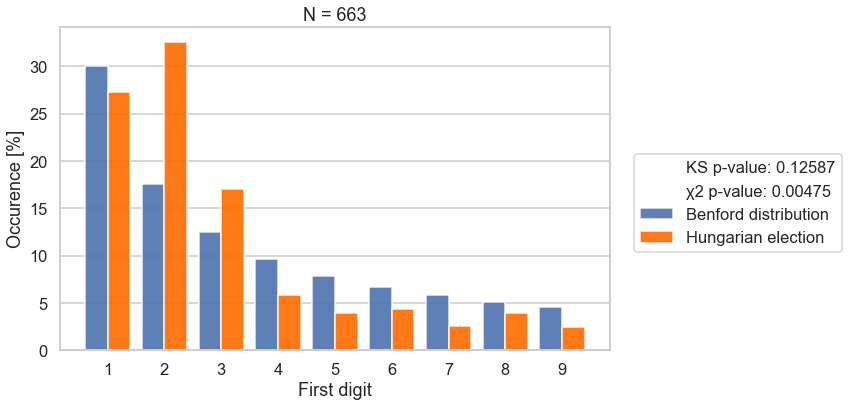

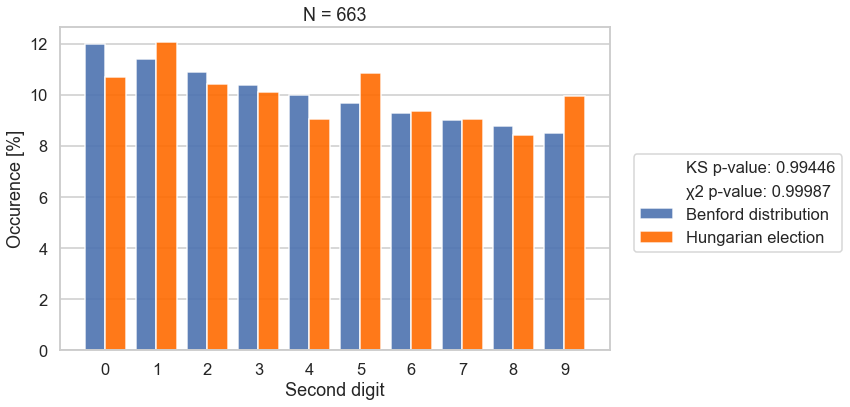

In [72]:
lol = benford_checker(df, 'votes', 'Hungarian election')